<h1 align=center>DIABETES PREDICTION</h1>
<h4 align=center> By Muhammad Jamil Abdulhamid  FE/23/22684843 </h4>

<img src="diabetes-1270350_1280.jpg" alt="stop_diabetes" >
<h4 align-left>Image by <a href="https://pixabay.com/users/nneem-1611501/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1270350">nneem</a> from <a href="https://pixabay.com//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1270350">Pixabay</a>

## Table of Contents
<ul>
<li><a href="#intro"> 1. Introduction</a></li>
<li><a href="#eda">2. Exploratory Data Analysis</a></li>
<li><a href="#model">3. Model Selection and Evaluation</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
<li><a href="#ref">5. References</a></li>
</ul>

<div id='intro'></div>

## 1. Introduction

According to world health organization (WHO), there is a growing number of people that are diagnosed with diabetes. The ability to predict a diabetes based on certain features will help in early detection. In this project, a Random Forest Regressor was deployed to build, and test a model to predict the whether a patient will be diagnosed diabetic or not diabetic based on several features in the data sets.

### 1.1 About the data

The data was obtained on kaggle website, ([here](https://www.kaggle.com/datasets/mrsimple07/diabetes-prediction)).

### 1.2 Import libraries

The following dependencies will be used for the project.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for visualition
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier # machine learning algorithm
from sklearn.metrics import accuracy_score # for evaluation
import pickle # for saving and loading model

### 1.3 Load data

The data will be loaded into a pandas dataframe.

In [2]:
df_diab = pd.read_csv("Diabetes_prediction.csv")

print('shape of df_train', df_diab.shape)
df_diab.head()

shape of df_train (1000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


 import data
 clean data
 split
 create model
 train model
 predict
 evaluate

### 1.4 Clean data

In this section, the data will be inspected and cleaned where necessary.

In [3]:
# Descriptive stats of df
df_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [4]:
# Check for missing values
df_diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

There are no missing data.

In [5]:
# Remove ages that are not upto 1 
df_diab = df_diab[(df_diab['Age'] > 0)]

In [6]:
# Inspect dataframe
df_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1.773547,99.423058,72.168273,23.277974,84.584162,25.423563,0.449630,43.370151,0.305611
std,1.354372,19.482648,13.881726,1.174221,74.947225,3.678979,0.199376,14.344350,0.460897
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,2.082077,0.000000
25%,1.000000,86.123869,62.781086,22.498862,34.808113,23.017933,0.283851,33.565751,0.000000
50%,2.000000,99.279249,71.909588,23.275225,84.442232,25.455649,0.448219,43.644349,0.000000
75%,3.000000,113.188858,82.016230,24.050519,134.313111,27.970606,0.619229,53.099550,1.000000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.000000


<div id='eda'></div>

## 2. Exploratory Data Analysis

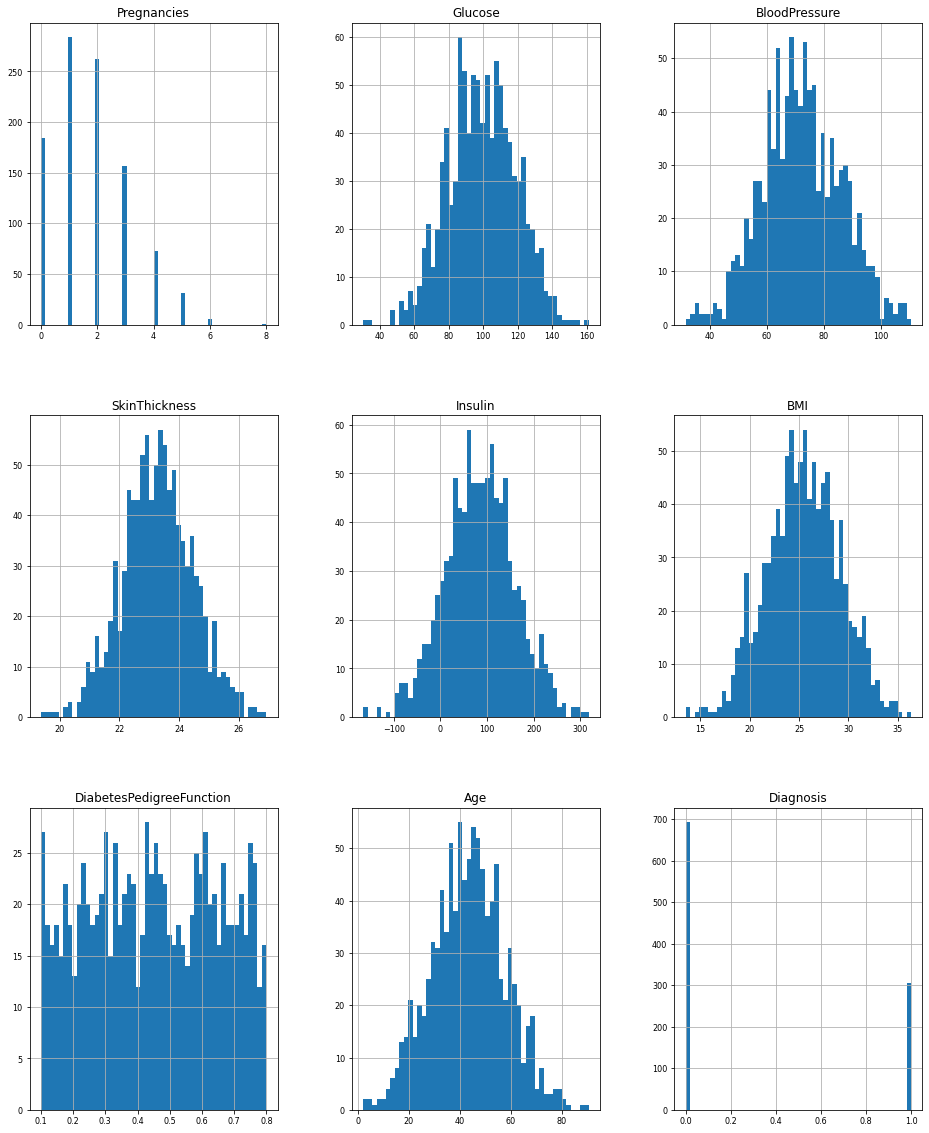

In [7]:
# Explore features of dataset
df_diab.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

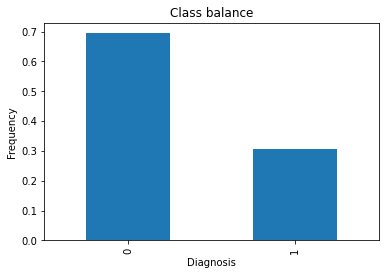

In [8]:
# Plot class balance
df_diab["Diagnosis"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Diagnosis",
    ylabel="Frequency",
    title='Class balance'
);

<div id='model'></div>

## 3. Model Selection and Evaluation

### 3.1 Split

In [9]:
# Split data into feature matrix `X` and target vector `y`.
Target = "Diagnosis"
X = df_diab.drop(columns=Target)
y = df_diab[Target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (998, 8)
y shape: (998,)


In [10]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_test.shape)
print("y_val shape:", y_test.shape)

X_train shape: (798, 8)
y_train shape: (798,)
X_val shape: (200, 8)
y_val shape: (200,)


### 3.2 Build model

In [11]:
# Number of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every  split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [12]:
# Create param grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
    
}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [13]:
# Create a classifier
clf = RandomForestClassifier(random_state=42)

In [14]:
# Create a GridSearchCV named model that includes your classifier and hyperparameter grid.

model = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [15]:
# Fit model

model.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=1)

### 3.3 Predict and evaluate

In [16]:
# Make predictions
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.71

### 3.4 Save model

In [18]:
# Save model
with open("model-diabetes_prediction.pkl", 'wb') as f:
    pickle.dump(model,f)

<div id='conclusions'></div>

## 4. Conclussion

Based on the accuracy score, the model has predicted 71% accurately. Despite this score, the model can still be further fine tuned for better performance.

<div id='ref'></div>

## 5. References

1. kaggle website
2. Documentations of pandas, matplotlib, and sklearn.